### t2.small, AWS Marketplace -> Anaconda with Python 3

### 1) Confusion Matrix

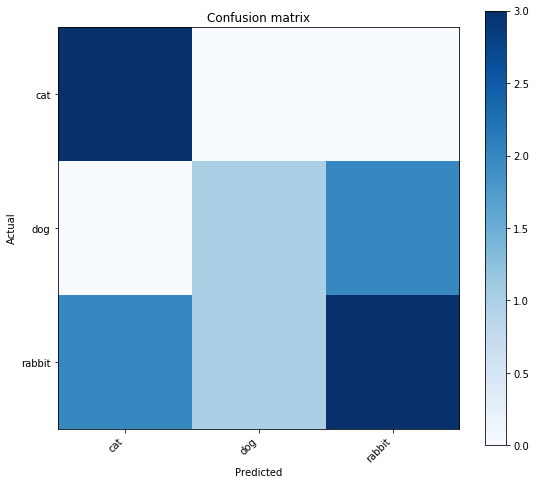

In [4]:
import matplotlib.pyplot as plt
from pandas_ml import ConfusionMatrix

y_true = ['rabbit', 'cat', 'rabbit', 'rabbit', 'cat',    'dog', 'dog', 'rabbit', 'rabbit', 'cat',    'dog', 'rabbit']
y_pred = ['cat'   , 'cat', 'rabbit',    'dog', 'cat', 'rabbit', 'dog',    'cat', 'rabbit', 'cat', 'rabbit', 'rabbit']

ConfusionMatrix(y_true, y_pred).plot(cmap=plt.cm.Blues)
plt.colorbar()

### 2) Receiver Operating Characteristic

Area Under Curve (summary of model skill): 0.681


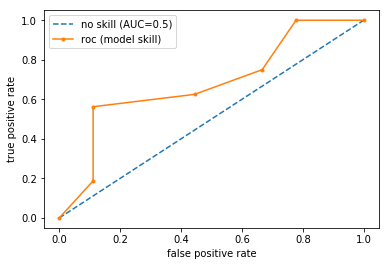

In [19]:
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

probabilities = KNeighborsClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probabilities)

pyplot.plot([0, 1], linestyle='--',                              label='no skill (AUC=0.5)')
pyplot.plot(false_positive_rate, true_positive_rate, marker='.', label='roc (model skill)')
pyplot.xlabel('false positive rate')
pyplot.ylabel('true positive rate')
pyplot.legend()

print('Area Under Curve (summary of model skill): %.3f' % roc_auc_score(y_test, probabilities))

### 3) Precision-Recall Curve

F-measure:            0.857
Area Under the Curve: 0.948
Average Precision:    0.922


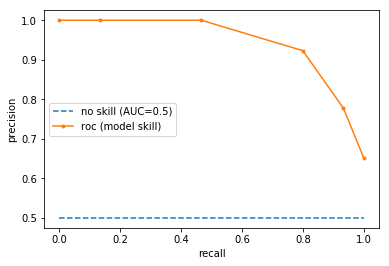

In [29]:
from matplotlib import pyplot
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification()

X_train, X_test, y_train, y_test = train_test_split(X, y)

model         = KNeighborsClassifier().fit(X_train, y_train)
probabilities = model.predict_proba(X_test)[:, 1]
predictions   = model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

pyplot.plot([0.5, 0.5], linestyle='--',    label='no skill (AUC=0.5)')
pyplot.plot(recall, precision, marker='.', label='roc (model skill)')
pyplot.xlabel('recall')
pyplot.ylabel('precision')
pyplot.legend()

print('F-measure:            %.3f' % (f1_score(y_test, predictions)))
print('Area Under the Curve: %.3f' % (auc(recall, precision)))
print('Average Precision:    %.3f' % (average_precision_score(y_test, probabilities)))